<a href="https://colab.research.google.com/github/Chirag050/Computer_Vision/blob/main/DLCV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Chirag Prasad
# 102322021
# 3V11

In [ ]:
# STEP 1. Read the clicked image through Pillow and OpenCV libraries and show
# the files. Use a different variable name for both methods of image reading.
# Importing necessary libraries
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

In [ ]:
# Defining path of image
image_path = "sample_image.png"
# Read using pillow
image_pillow = Image.open(image_path)
# Read using OpenCV
image_opencv = cv2.imread(image_path)

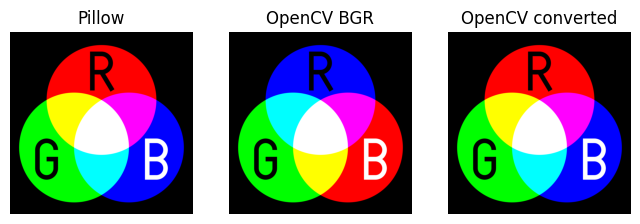

In [ ]:
# Setting up a side-by-side plot to show both
plt.figure(figsize=(8, 8))

# Plotting the Pillow image
plt.subplot(1, 3, 1)
plt.title("Pillow")
plt.imshow(image_pillow)
plt.axis('off')

# Plotting the OpenCV image
# Note: OpenCV reads in BGR format
plt.subplot(1, 3, 2)
plt.title("OpenCV BGR")
plt.imshow(image_opencv)
plt.axis('off')

# Convert to RGB for correct display in Matplotlib
plt.subplot(1, 3, 3)
plt.title("OpenCV converted")
plt.imshow(cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# STEP 2. Show the shape, size, mode, and format of your image.
# Please mind the format used to read the image and apply the conversion accordingly.

print("1. Pillow Image Attributes")
print(f"Shape/Size (Width, Height): {image_pillow.size}")
print(f"Mode: {image_pillow.mode}")
print(f"Format: {image_pillow.format}") # Source format (e.g., JPEG, PNG)

print("\n2. OpenCV Image Attributes (Raw)")
h, w, c = image_opencv.shape
print(f"Shape (Height, Width, Channels): {image_opencv.shape}")
print(f"Total Number of Pixels: {image_opencv.size}")
print(f"Data Type: {image_opencv.dtype}")
print("Format: None (Raw Pixel Data)") # Arrays don't remember if they were JPEGs or PNGs

# --- APPLYING CONVERSION ---
# OpenCV reads in BGR format and creates a raw array.
# To match the Pillow standard (RGB) and prepare for PDF creation, we must convert it.

# 1. Convert Color: BGR (OpenCV standard) -> RGB (Real world standard)
image_opencv_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

# 2. Convert Type: NumPy Array -> Pillow Object
image_opencv_converted = Image.fromarray(image_opencv_rgb)

print("\n3. Converted OpenCV Image")
print("Success! The OpenCV image is now a Pillow Object in RGB mode.")
print(f"New Mode: {image_opencv_converted.mode}")
print(f"New Size: {image_opencv_converted.size}")

1. Pillow Image Attributes
Shape/Size (Width, Height): (1200, 1200)
Mode: RGB
Format: PNG

2. OpenCV Image Attributes (Raw)
Shape (Height, Width, Channels): (1200, 1200, 3)
Total Number of Pixels: 4320000
Data Type: uint8
Format: None (Raw Pixel Data)

3. Converted OpenCV Image
Success! The OpenCV image is now a Pillow Object in RGB mode.
New Mode: RGB
New Size: (1200, 1200)


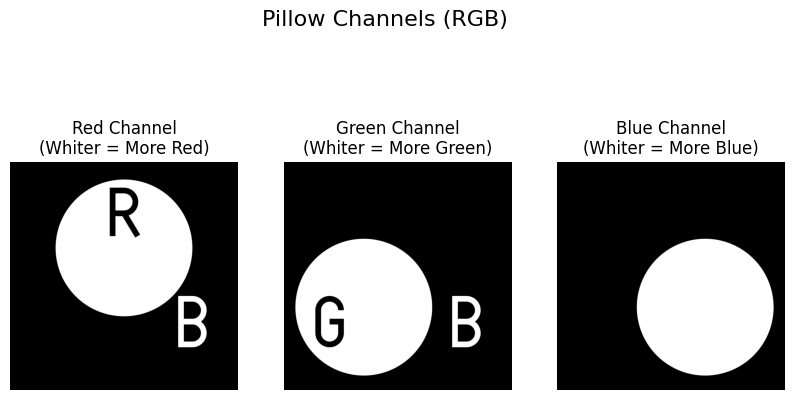

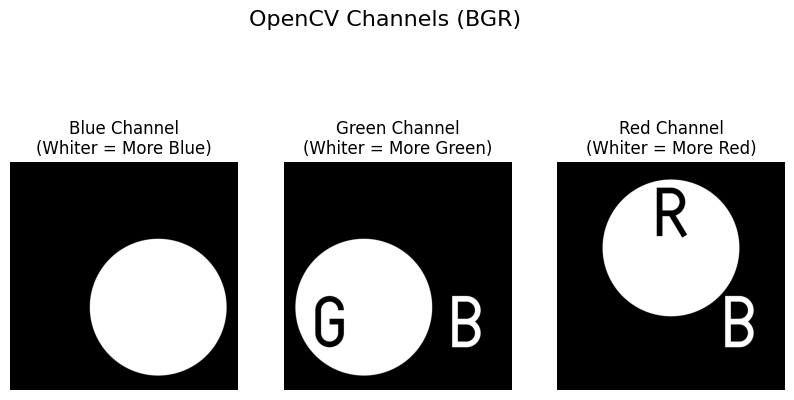

In [ ]:
# STEP 3. Split the image into its channels and show each channel output.

# 1. Splitting with Pillow
# Pillow is RGB, so .split() returns Red, Green, Blue in that order.
r_pil, g_pil, b_pil = image_pillow.split()

# Display Pillow Channels
fig, axs = plt.subplots(1, 3, figsize=(10, 5.5))
fig.suptitle('Pillow Channels (RGB)', fontsize=16)

# Red Channel
axs[0].imshow(r_pil, cmap='gray')
axs[0].set_title("Red Channel\n(Whiter = More Red)")
axs[0].axis('off')

# Green Channel
axs[1].imshow(g_pil, cmap='gray')
axs[1].set_title("Green Channel\n(Whiter = More Green)")
axs[1].axis('off')

# Blue Channel
axs[2].imshow(b_pil, cmap='gray')
axs[2].set_title("Blue Channel\n(Whiter = More Blue)")
axs[2].axis('off')

plt.show()

# 2. Splitting with OpenCV
# OpenCV is BGR, so cv2.split() returns Blue, Green, Red in that order.
b_cv, g_cv, r_cv = cv2.split(image_opencv)

# Display OpenCV Channels
fig, axs = plt.subplots(1, 3, figsize=(10, 5.5))
fig.suptitle('OpenCV Channels (BGR)', fontsize=16)

# Blue Channel
axs[0].imshow(b_cv, cmap='gray')
axs[0].set_title("Blue Channel\n(Whiter = More Blue)")
axs[0].axis('off')

# Green Channel
axs[1].imshow(g_cv, cmap='gray')
axs[1].set_title("Green Channel\n(Whiter = More Green)")
axs[1].axis('off')

# Red Channel
axs[2].imshow(r_cv, cmap='gray')
axs[2].set_title("Red Channel\n(Whiter = More Red)")
axs[2].axis('off')

plt.show()

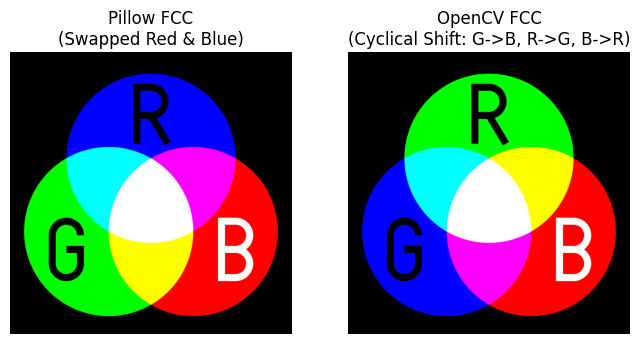

In [ ]:
# STEP 4. Merge the channels in different ways and generate the FCC.
# False Colour composition

# 1. Pillow Method: Swapping Channels
# Normal Order: RGB
# FCC Order: BGR (We put the Blue data in the Red slot, and Red data in the Blue slot)
fcc_pillow = Image.merge("RGB", (b_pil, g_pil, r_pil))

# 2. OpenCV Method: Shifting Channels
# Normal Order for OpenCV: BGR
# FCC Order: GRB (Green data -> Blue channel, Red data -> Green channel, Blue data -> Red channel)
fcc_opencv = cv2.merge([g_cv, r_cv, b_cv])

# --- DISPLAYING THE RESULTS ---

plt.figure(figsize=(8, 6))

# Display Pillow FCC
plt.subplot(1, 2, 1)
plt.title("Pillow FCC\n(Swapped Red & Blue)")
plt.imshow(fcc_pillow)
plt.axis('off')

# Display OpenCV FCC
# Note: Since we intentionally messed up the channels for the FCC,
# we convert it 'correctly' here just so Matplotlib displays our weird colors accurately.
plt.subplot(1, 2, 2)
plt.title("OpenCV FCC\n(Cyclical Shift: G->B, R->G, B->R)")
plt.imshow(cv2.cvtColor(fcc_opencv, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

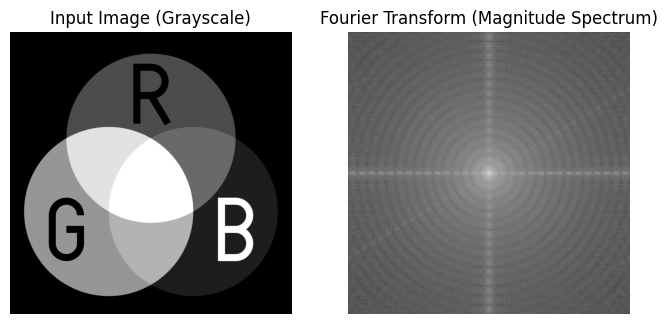

In [ ]:
# STEP 5. Apply DFT on either the original image or on any single channel and
# show the Fourier transformation.

# 1. Prepare the image: Convert to Grayscale
# DFT is mathematically performed on 2D arrays (intensity values).
gray_image = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)

# 2. Apply DFT using OpenCV
# We convert the image to float32 first, as DFT requires floating point numbers.
dft = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)

# 3. Shift the Zero Frequency (DC Component) to the center
# By default, the low frequencies are in the corner. We shift them to the center for visualization.
dft_shift = np.fft.fftshift(dft)

# 4. Calculate Magnitude Spectrum
# The raw DFT result is complex numbers. We need the magnitude to visualize it.
# We use log scale (20 * log) because the dynamic range is too large to see otherwise.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# --- DISPLAYING THE RESULTS ---

plt.figure(figsize=(8, 6))

# Original Grayscale Image
plt.subplot(1, 2, 1)
plt.title("Input Image (Grayscale)")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.title("Fourier Transform (Magnitude Spectrum)")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.show()

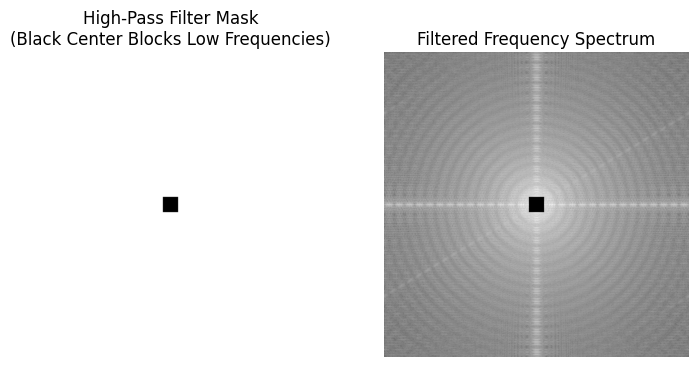

In [ ]:
# STEP 6. Create and apply a high-pass filter and show the results in the frequency domain.

# 1. Create the HPF Mask
# We create a mask of '1's (pass) and set the center to '0's (block)
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2  # Find the center coordinates

mask = np.ones((rows, cols, 2), np.uint8)
r = 30  # Radius of the blocked center (Low Frequencies)
mask[crow-r:crow+r, ccol-r:ccol+r] = 0

# 2. Apply the Mask to the DFT (Frequency Domain)
# Multiply the shifted DFT (from Step 5) by the mask
fshift = dft_shift * mask

# 3. Visualizing the Filtered Spectrum
# We calculate the magnitude just for display purposes
fshift_magnitude = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + 1)

# Display the Mask and the Filtered Spectrum
plt.figure(figsize=(8.65, 6))

plt.subplot(1, 2, 1)
plt.title("High-Pass Filter Mask\n(Black Center Blocks Low Frequencies)")
plt.imshow(mask[:, :, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Filtered Frequency Spectrum")
plt.imshow(fshift_magnitude, cmap='gray')
plt.axis('off')

plt.show()

1.   High-Pass:
*   Closer to original, Decrease r (e.g., change 30 to 10)
*   Abstract/edges only, Increase r (e.g., change 30 to 60)

2.   Low-Pass:
*   Less blurry (smoothen lesser), Increase r (e.g., change 30 to 80)
*   More blurry, Decrease r (e.g., change 30 to 10)

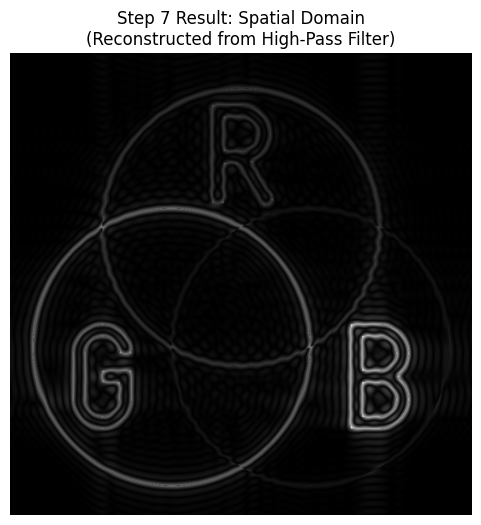

In [ ]:
# STEP 7. Show the resultant image in the spatial domain
# by using the inverse Fourier transformation

# 1. Shift the Zero Frequency back to the corner
# The DFT had (0,0) in the center. The IDFT expects it in the top-left corner.
f_ishift = np.fft.ifftshift(fshift)

# 2. Apply Inverse DFT (IDFT)
# This converts the complex frequency numbers back into spatial coordinates.
img_back_complex = cv2.idft(f_ishift)

# 3. Calculate Magnitude
# The result is complex (Real + Imaginary). We need the magnitude to view it as an image.
img_back_spatial = cv2.magnitude(img_back_complex[:, :, 0], img_back_complex[:, :, 1])

# Display the Final Result
plt.figure(figsize=(6, 6))
plt.title("Step 7 Result: Spatial Domain\n(Reconstructed from High-Pass Filter)")
plt.imshow(img_back_spatial, cmap='gray')
plt.axis('off')

plt.show()

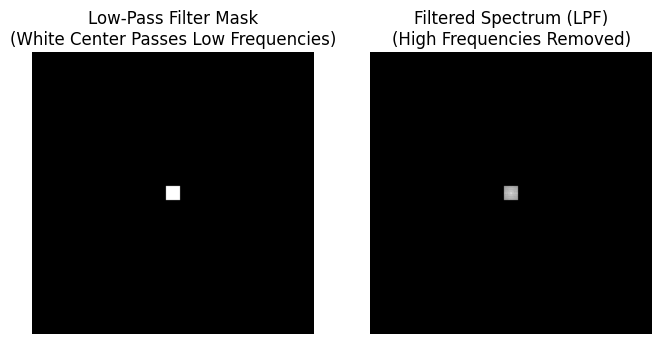

In [ ]:
# STEP 8. Create and apply a low-pass filter and show the results in the frequency domain.
# Apply the filter on the original image.

# 1. Create the LPF Mask
# Initialize a mask of '0's (block everything by default)
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2

mask_lpf = np.zeros((rows, cols, 2), np.uint8)

# Set the center area to '1's (allow pass)
# Increasing 'r' lets more detail through; decreasing 'r' makes it blurrier.
r = 30
mask_lpf[crow-r:crow+r, ccol-r:ccol+r] = 1

# 2. Apply the Mask to the Original DFT
# We use 'dft_shift' from Step 5 (the original image's spectrum)
fshift_lpf = dft_shift * mask_lpf

# 3. Calculate Magnitude for Display
fshift_lpf_magnitude = 20 * np.log(cv2.magnitude(fshift_lpf[:, :, 0], fshift_lpf[:, :, 1]) + 1)

# Display the Mask and Filtered Spectrum
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.title("Low-Pass Filter Mask\n(White Center Passes Low Frequencies)")
plt.imshow(mask_lpf[:, :, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Filtered Spectrum (LPF)\n(High Frequencies Removed)")
plt.imshow(fshift_lpf_magnitude, cmap='gray')
plt.axis('off')

plt.show()

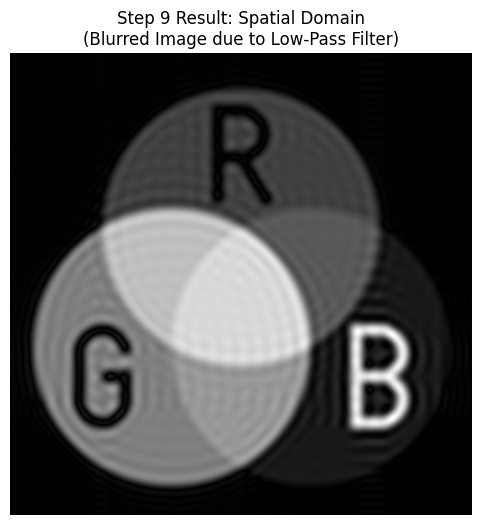

In [ ]:
# STEP 9. Show the resultant image after application of a low-pass filter in the
# spatial domain by using the inverse Fourier transformation.

# 1. Shift the Zero Frequency back to the corner
f_ishift_lpf = np.fft.ifftshift(fshift_lpf)

# 2. Apply Inverse DFT
img_back_lpf_complex = cv2.idft(f_ishift_lpf)

# 3. Calculate Magnitude
img_back_lpf_spatial = cv2.magnitude(img_back_lpf_complex[:, :, 0], img_back_lpf_complex[:, :, 1])

# Display the Result
plt.figure(figsize=(6, 6))
plt.title("Step 9 Result: Spatial Domain\n(Blurred Image due to Low-Pass Filter)")
plt.imshow(img_back_lpf_spatial, cmap='gray')
plt.axis('off')

plt.show()